In [1]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def single_linkage(clusters):
    min_distance = float('inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = np.min([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            if distance < min_distance:
                min_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

def complete_linkage(clusters):
    max_distance = float('-inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = np.max([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            if distance > max_distance:
                max_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

def average_linkage(clusters):
    avg_distance = float('inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distances = [euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]]
            distance = np.mean(distances)
            if distance < avg_distance:
                avg_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

def centroid_linkage(clusters):
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    min_distance = float('inf')
    pair_to_merge = None
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            distance = euclidean_distance(centroids[i], centroids[j])
            if distance < min_distance:
                min_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

def ward_linkage(clusters):
    min_increase = float('inf')
    pair_to_merge = None
    total_variance = lambda cluster: np.sum((cluster - np.mean(cluster, axis=0)) ** 2)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            combined_cluster = np.vstack((clusters[i], clusters[j]))
            increase = total_variance(combined_cluster) - total_variance(clusters[i]) - total_variance(clusters[j])
            if increase < min_increase:
                min_increase = increase
                pair_to_merge = (i, j)
    return pair_to_merge

# Example usage
data_points = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], [9, 7], [4, 8], [8, 3], [1, 4]])
clusters = [[point] for point in data_points]

# Run the linkage methods
print("Single Linkage Pair:", single_linkage(clusters))
print("Complete Linkage Pair:", complete_linkage(clusters))
print("Average Linkage Pair:", average_linkage(clusters))
print("Centroid Linkage Pair:", centroid_linkage(clusters))
print("Ward Linkage Pair:", ward_linkage(clusters))


Single Linkage Pair: (3, 6)
Complete Linkage Pair: (0, 5)
Average Linkage Pair: (3, 6)
Centroid Linkage Pair: (3, 6)
Ward Linkage Pair: (3, 6)


In [2]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to find the closest pairs based on Single Linkage
def single_linkage(clusters):
    min_distance = float('inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = np.min([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            if distance < min_distance:
                min_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

# Function for Complete Linkage
def complete_linkage(clusters):
    max_distance = float('-inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = np.max([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            if distance > max_distance:
                max_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

# Function for Average Linkage
def average_linkage(clusters):
    avg_distance = float('inf')
    pair_to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distances = [euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]]
            distance = np.mean(distances)
            if distance < avg_distance:
                avg_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

# Function for Centroid Linkage
def centroid_linkage(clusters):
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    min_distance = float('inf')
    pair_to_merge = None
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            distance = euclidean_distance(centroids[i], centroids[j])
            if distance < min_distance:
                min_distance = distance
                pair_to_merge = (i, j)
    return pair_to_merge

# Function for Ward's Method
def ward_linkage(clusters):
    min_increase = float('inf')
    pair_to_merge = None
    total_variance = lambda cluster: np.sum((cluster - np.mean(cluster, axis=0)) ** 2)
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            combined_cluster = np.vstack((clusters[i], clusters[j]))
            increase = total_variance(combined_cluster) - total_variance(clusters[i]) - total_variance(clusters[j])
            if increase < min_increase:
                min_increase = increase
                pair_to_merge = (i, j)
    return pair_to_merge

# Hierarchical Clustering Function
def hierarchical_clustering(data, linkage_method):
    clusters = [[point] for point in data]
    while len(clusters) > 1:
        if linkage_method == 'single':
            pair_to_merge = single_linkage(clusters)
        elif linkage_method == 'complete':
            pair_to_merge = complete_linkage(clusters)
        elif linkage_method == 'average':
            pair_to_merge = average_linkage(clusters)
        elif linkage_method == 'centroid':
            pair_to_merge = centroid_linkage(clusters)
        elif linkage_method == 'ward':
            pair_to_merge = ward_linkage(clusters)
        
        # Merge the clusters
        new_cluster = clusters[pair_to_merge[0]] + clusters[pair_to_merge[1]]
        clusters.append(new_cluster)
        
        # Remove the merged clusters
        clusters.pop(max(pair_to_merge))
        clusters.pop(min(pair_to_merge))
    
    return clusters[0]

# Example Data Points
data_points = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], [9, 7], [4, 8], [8, 3], [1, 4]])

# Run hierarchical clustering for each linkage method
for method in ['single', 'complete', 'average', 'centroid', 'ward']:
    clustered_data = hierarchical_clustering(data_points, method)
    clustered_data_list = [cluster.tolist() for cluster in clustered_data]
    print(f"Clusters using {method.capitalize()} Linkage: {clustered_data_list}")

Clusters using Single Linkage: [[9, 7], [9, 1], [7, 2], [8, 3], [3, 7], [4, 8], [1, 4], [1, 1], [3, 2]]
Clusters using Complete Linkage: [[7, 2], [8, 3], [3, 2], [3, 7], [9, 1], [4, 8], [1, 4], [1, 1], [9, 7]]
Clusters using Average Linkage: [[9, 7], [9, 1], [7, 2], [8, 3], [3, 7], [4, 8], [1, 4], [1, 1], [3, 2]]
Clusters using Centroid Linkage: [[9, 7], [9, 1], [7, 2], [8, 3], [3, 7], [4, 8], [1, 4], [1, 1], [3, 2]]
Clusters using Ward Linkage: [[9, 7], [9, 1], [7, 2], [8, 3], [3, 7], [4, 8], [1, 4], [1, 1], [3, 2]]


Proximity Matrix (Euclidean):
[[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.0710678

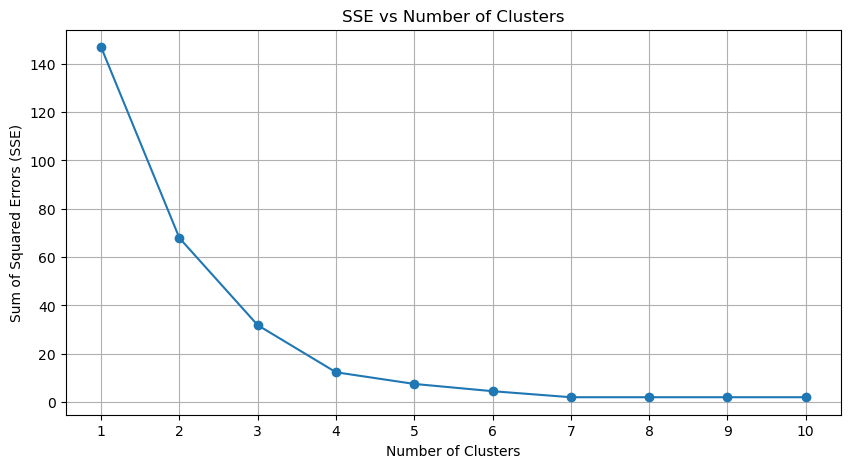

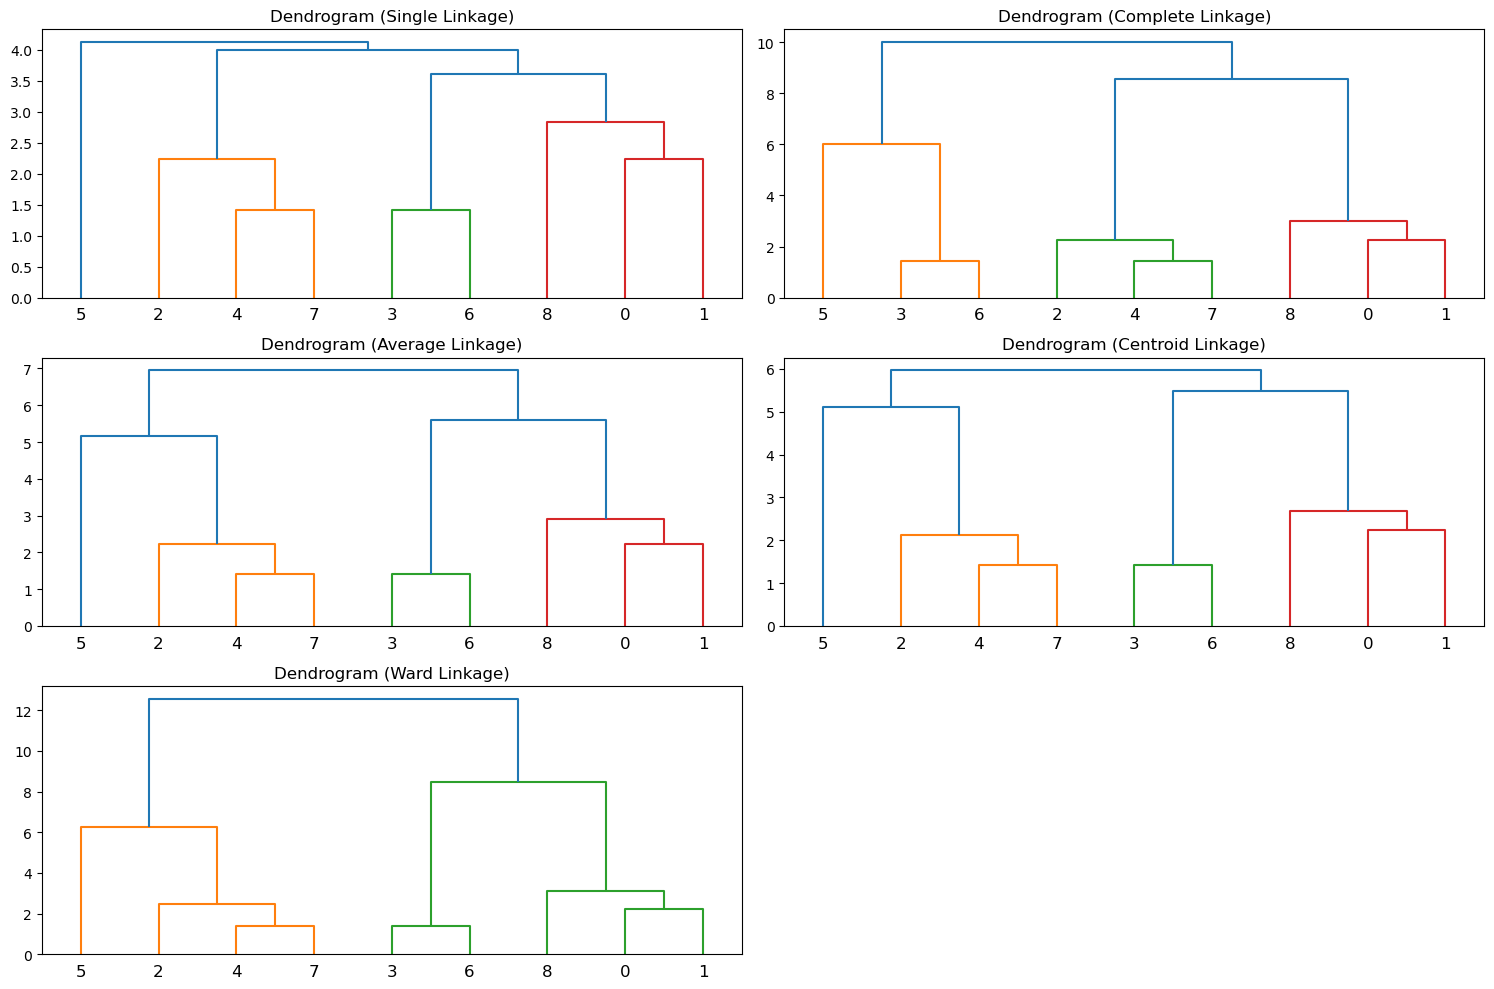

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # Import fcluster
from scipy.spatial.distance import pdist, squareform

# Define distance functions
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

# Calculate proximity matrix
def proximity_matrix(data, metric='euclidean'):
    n = data.shape[0]
    matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if metric == 'euclidean':
                matrix[i, j] = euclidean_distance(data[i], data[j])
            elif metric == 'manhattan':
                matrix[i, j] = manhattan_distance(data[i], data[j])
            elif metric == 'minkowski':
                matrix[i, j] = minkowski_distance(data[i], data[j])
    
    return matrix

# Function to calculate SSE
def calculate_sse(data, cluster_assignments):
    sse = 0
    for cluster in np.unique(cluster_assignments):
        cluster_points = data[cluster_assignments == cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

# Plot SSE against number of clusters
def plot_sse(data):
    sse_values = []
    max_k = 10  # Maximum number of clusters to consider

    for k in range(1, max_k + 1):
        # Use hierarchical clustering to assign clusters
        Z = linkage(data, method='ward')
        cluster_assignments = fcluster(Z, k, criterion='maxclust')
        sse = calculate_sse(data, cluster_assignments)
        sse_values.append(sse)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), sse_values, marker='o')
    plt.title('SSE vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

# Plot dendrogram for different linkage methods
def plot_dendrograms(data):
    methods = ['single', 'complete', 'average', 'centroid', 'ward']
    
    plt.figure(figsize=(15, 10))
    
    for i, method in enumerate(methods):
        plt.subplot(3, 2, i + 1)
        Z = linkage(data, method=method)
        dendrogram(Z)
        plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    
    plt.tight_layout()
    plt.show()

# Main code
data_points = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], [9, 7], [4, 8], [8, 3], [1, 4]])

# Calculate and display proximity matrices
print("Proximity Matrix (Euclidean):")
print(proximity_matrix(data_points, metric='euclidean'))

print("\nProximity Matrix (Manhattan):")
print(proximity_matrix(data_points, metric='manhattan'))

print("\nProximity Matrix (Minkowski):")
print(proximity_matrix(data_points, metric='minkowski'))

# Plot SSE
plot_sse(data_points)

# Plot Dendrograms
plot_dendrograms(data_points)
